<a href="https://colab.research.google.com/github/1013115/KTB_Project/blob/main/KTB_Day7_GenAI_Practice_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 시각화 I 실습

막대그래프, 선그래프, 히스토그램, 파이차트, 산점도, 박스플롯을 구현해봅니다.

실습에 사용하는 데이터는 https://www.kaggle.com/datasets/nikhil7280/weather-type-classification 데이터입니다.

본인이 원하는 다른 데이터가 있다면 다른 데이터를 사용하셔도 좋습니다.

데이터에서 적절한 데이터를 선정하여 각 시각화 분석에 적용합니다.

시각화를 진행할 때는 차트 뿐만 아니라 범례, 제목, 레이블, 색상, 크기 등 여러가지 요소들을 직접 개발하시면서

데이터의 특성을 잘 이해해보시면 좋을 것 같습니다.

In [4]:
! kaggle datasets download -d nikhil7280/weather-type-classification

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 85.8MB/s]


In [5]:
! unzip /content/weather-type-classification.zip

Archive:  /content/weather-type-classification.zip
  inflating: weather_classification_data.csv  


In [24]:
import pandas as pd

data = pd.read_csv('/content/weather_classification_data.csv')

print("#"*10)
print("데이터의 처음 몇 줄을 출력하여 구조 확인")
print(data.head())

print("#"*10)
print("데이터의 각 칼럼에 대한 정보 확인")
print(data.info())

##########
데이터의 처음 몇 줄을 출력하여 구조 확인
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4 

In [7]:
print("#"*10)
print("데이터 타입 확인")
print("Data Types:\n", data.dtypes)

categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", categorical_cols)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", numerical_cols)


##########
데이터 타입 확인
Data Types:
 Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object
##########
범주형 데이터 분리하여 분석

Categorical Columns:
 Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')
##########
수치형 데이터 분리하여 분석

Numerical Columns:
 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')


In [8]:
# 아마도..? 리스트로만 받아올 수 있다고 생각하여 set으로 한번 변환해서 중복제거
season = data['Season'].tolist()
season = list(set(season))
print(season)

# 계절별 평균 바람 세기
ws_spring = data[data['Season']=='Spring']['Wind Speed'].mean()
ws_autumn = data[data['Season']=='Autumn']['Wind Speed'].mean()
ws_winter = data[data['Season']=='Winter']['Wind Speed'].mean()
ws_summer = data[data['Season']=='Summer']['Wind Speed'].mean()
wind_speed = [ws_autumn,ws_winter, ws_summer, ws_spring]

['Spring', 'Summer', 'Autumn', 'Winter']


In [9]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

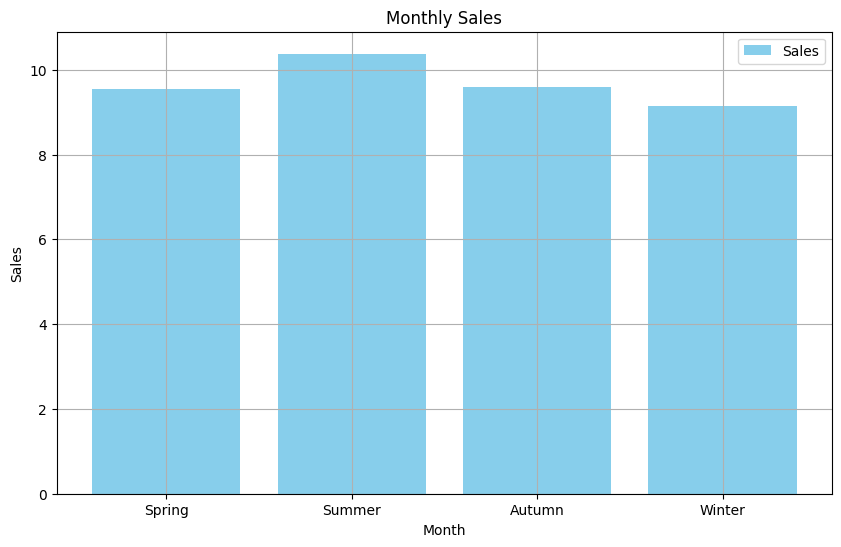

In [10]:
# 1. 막대그래프
# 범주형 데이터랑 수치형 데이터
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(season, wind_speed , color='skyblue', label='Sales')  # 막대그래프 생성
plt.title('Monthly Sales')  # 제목 추가
plt.xlabel('Month')  # x축 레이블 추가
plt.ylabel('Sales')  # y축 레이블 추가
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

In [11]:
summer_t = data[data['Season']=='Summer']['Temperature'].tolist()
spring_t = data[data['Season']=='Spring']['Temperature'].tolist()
summer_t = summer_t[0:10:1]
spring_t = spring_t[0:10:1]
mapping = lambda lst: list(map(lambda x: x + 1, range(len(lst))))
data = {'day':mapping(summer_t), 'summer':summer_t, 'spring':spring_t}
print(data)
df = pd.DataFrame(data)

{'day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'summer': [32.0, 10.0, 13.0, 33.0, 26.0, 17.0, 36.0, 22.0, 26.0, 25.0], 'spring': [39.0, 30.0, 38.0, 35.0, 30.0, 43.0, 38.0, 28.0, -9.0, 21.0]}


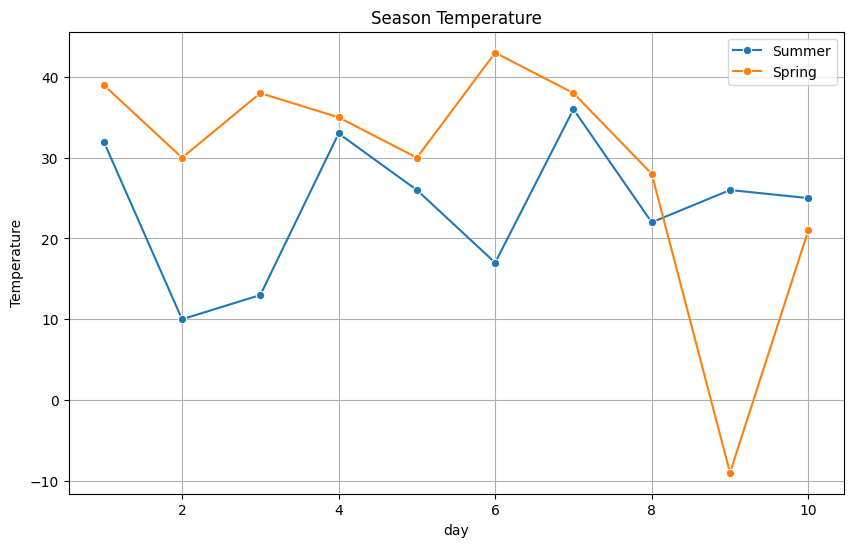

In [12]:
# 2. 선그래프
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.lineplot(x='day', y='summer', data=df, marker='o', label='Summer')
sns.lineplot(x='day', y='spring', data=df, marker='o', label='Spring')
plt.title('Season Temperature')  # 제목 추가
plt.ylabel('Temperature')  # y축 레이블 추가
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()

In [15]:
pressure = data['Temperature'].tolist()
data = pressure[:100:]

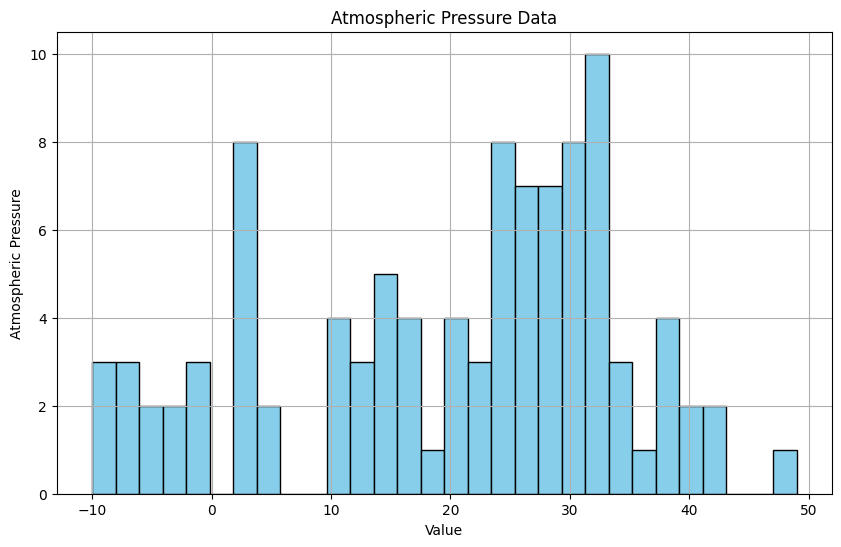

In [16]:
# 3. 히스토그램
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title('Atmospheric Pressure Data')  # 제목 추가
plt.xlabel('Value')  # x축 레이블 추가
plt.ylabel('Atmospheric Pressure')  # y축 레이블 추가
plt.grid(True)  # 그리드 추가
plt.show()

In [19]:
hum_spring = data[data['Season']=='Spring']['Humidity'].mean()
hum_autumn = data[data['Season']=='Autumn']['Humidity'].mean()
hum_winter = data[data['Season']=='Winter']['Humidity'].mean()
hum_summer = data[data['Season']=='Summer']['Humidity'].mean()
sizes = [hum_autumn, hum_winter, hum_summer, hum_spring]
explode = (0.1, 0, 0, 0)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

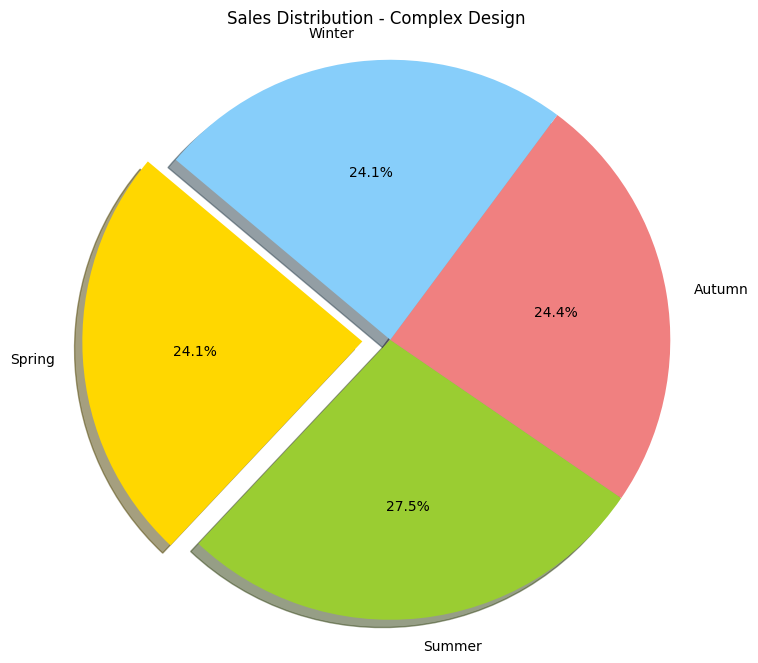

In [20]:
# 4. 파이차트
plt.figure(figsize=(8, 8))  # 그래프 크기 설정
plt.pie(sizes, explode=explode, labels=season, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sales Distribution - Complex Design')
plt.axis('equal')  # 파이차트를 원형으로 유지
plt.show()

In [22]:
tem = data['Temperature'].tolist()
hum = data['Humidity'].tolist()

data = {
    'temperate':tem[:100:],
    'humidity':hum[:100:]
}
df = pd.DataFrame(data)

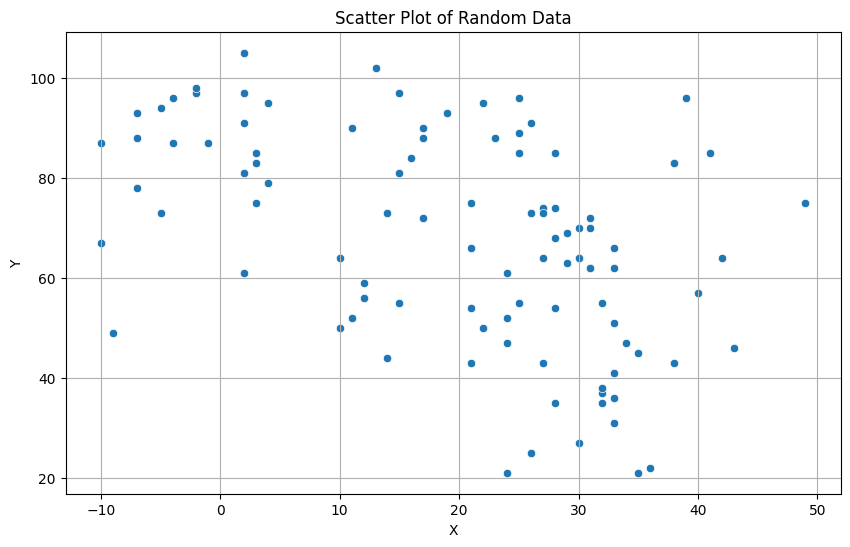

In [23]:
# 5. 산점도
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.scatterplot(x='temperate', y='humidity', data=df)
plt.title('Scatter Plot of Random Data')  # 제목 추가
plt.xlabel('X')  # x축 레이블 추가
plt.ylabel('Y')  # y축 레이블 추가
plt.grid(True)  # 그리드 추가
plt.show()

In [25]:
summer_t = data[data['Season']=='Summer']['Temperature'].tolist()
spring_t = data[data['Season']=='Spring']['Temperature'].tolist()
summer_t = summer_t[0:100:1]
spring_t = spring_t[0:10:1]
# mapping = lambda lst: list(map(lambda x: x + 1, range(len(lst))))
data = {'day':np.random.choice(['A','B'],100), 'Value':summer_t}


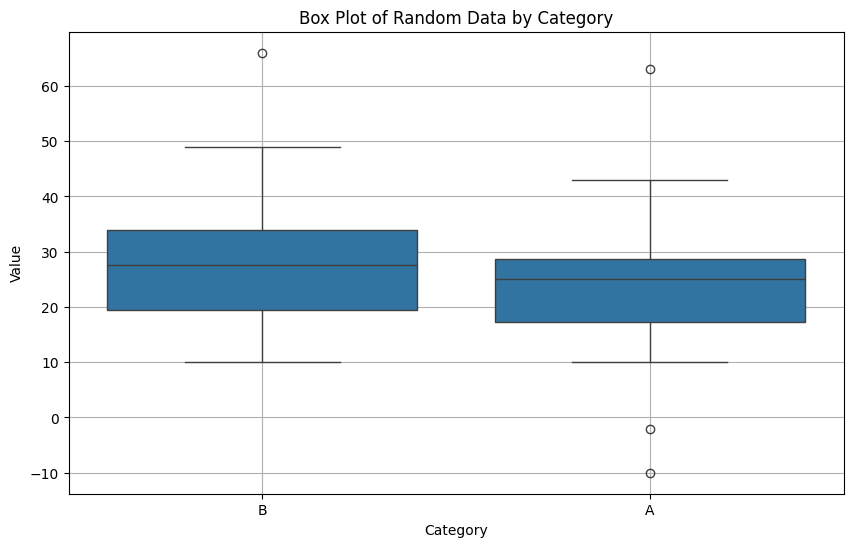

In [26]:
# 6. 박스플롯
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.boxplot(x='day', y='Value', data=data)
plt.title('Box Plot of Random Data by Category')  # 제목 추가
plt.xlabel('Category')  # x축 레이블 추가
plt.ylabel('Value')  # y축 레이블 추가
plt.grid(True)  # 그리드 추가
plt.show()

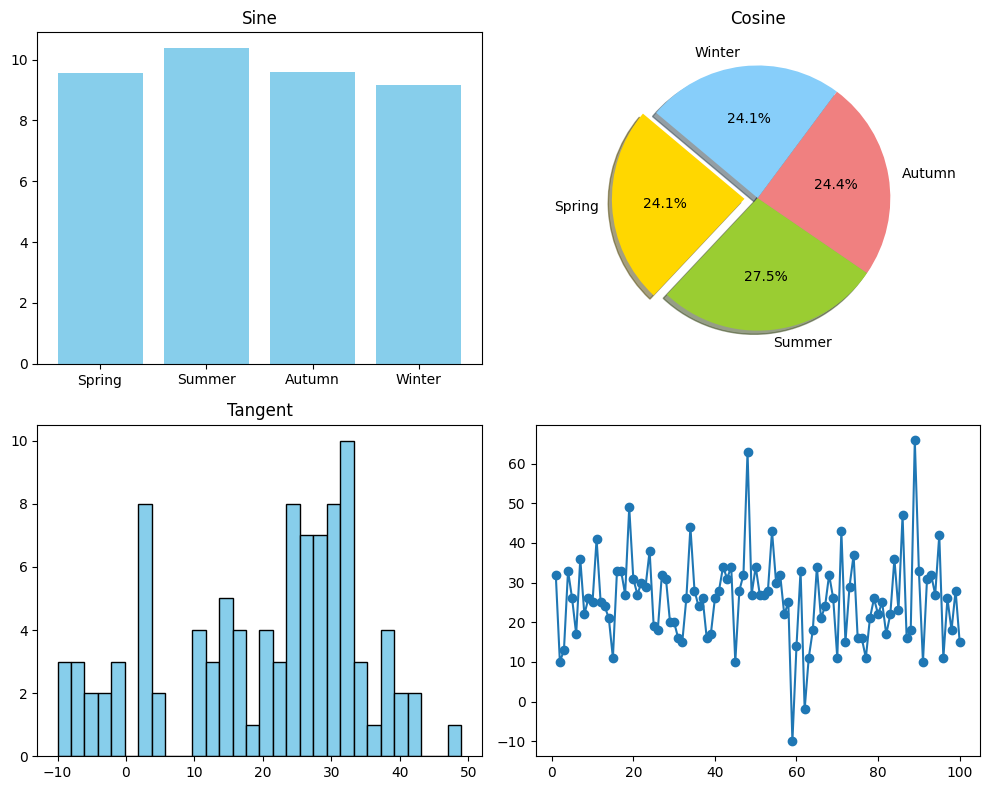

In [36]:
# 7. 여러 시각화 차트 합쳐보기
import matplotlib.pyplot as plt
import numpy as np

# 서브플롯을 생성, 2행 2열의 레이아웃
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 첫 번째 서브플롯
axs[0, 0].bar(season, wind_speed , color='skyblue', label='Sales')
axs[0, 0].set_title('Sine')

# 두 번째 서브플롯
axs[0, 1].pie(sizes, explode=explode, labels=season, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0, 1].set_title('Cosine')
data = pressure[:100:]
# 세 번째 서브플롯
axs[1, 0].hist(data, bins=30, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Tangent')

# 네 번째 서브플롯
axs[1, 1].plot(mapping(summer_t), summer_t,  marker='o', label='Summer')

# 레이아웃 조정
fig.tight_layout()

# 플롯을 보여줌
plt.show()
